# Probability Distributions

A probability distribution describes how probabilities are assigned to the possible values of a random variable.

Random variable → a variable that takes different values based on chance.

[![test.jpg](https://i.postimg.cc/L6dsjJgR/test.jpg)](https://postimg.cc/kDc9mXyh)




In [8]:
# Paste this as one cell at top of notebook (or use existing imports)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visual settings
plt.rcParams['figure.figsize'] = (8,4)
sns.set(style="whitegrid")
np.random.seed(42)   # reproducible


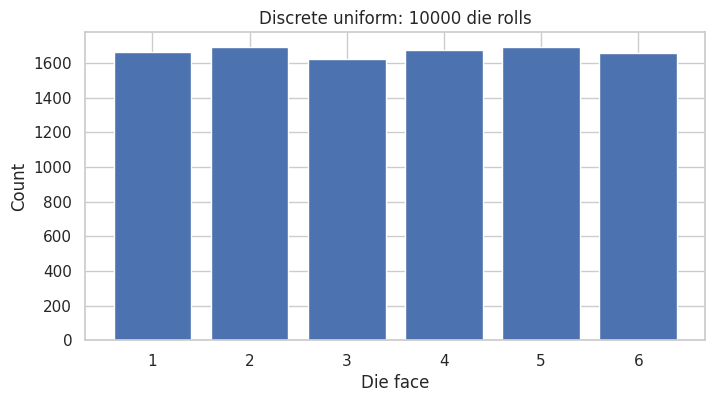

In [9]:
# Parameters
N = 10000  # number of rolls (you can increase; 10k is fine for Colab)
sides = [1,2,3,4,5,6]

# Simulate
rolls = np.random.randint(1, 7, size=N)

# Count and plot
counts = [np.sum(rolls == s) for s in sides]
plt.bar(sides, counts)
plt.xlabel('Die face')
plt.ylabel('Count')
plt.title(f'Discrete uniform: {N} die rolls')
plt.xticks(sides)
plt.show()


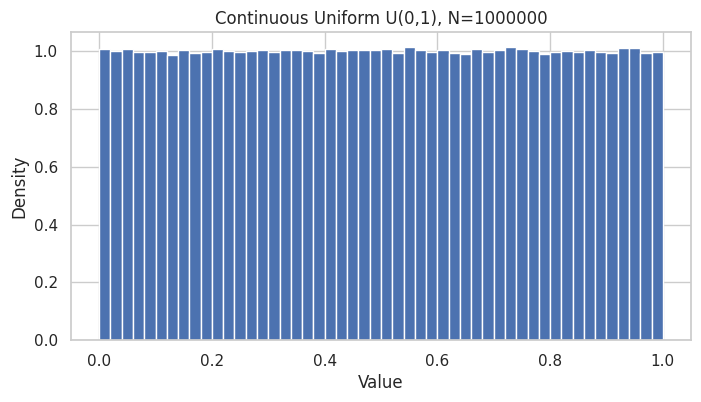

In [10]:
N = 1_000_000   # recommended; reduce to 100_000 if Colab is slow
samples = np.random.rand(N)   # U(0,1)

plt.hist(samples, bins=50, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Continuous Uniform U(0,1), N={N}')
plt.show()


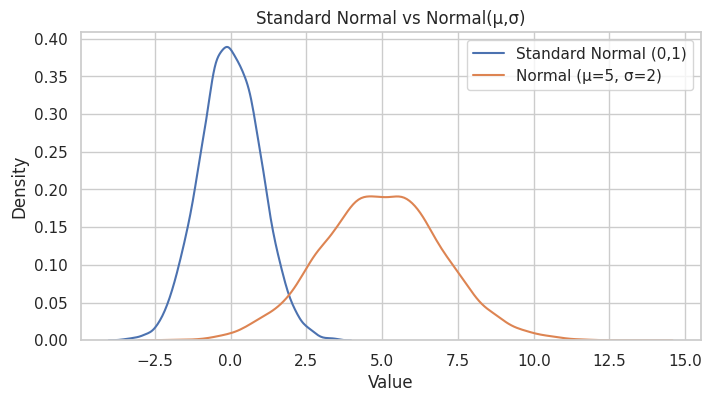

In [11]:
N = 10000
standard = np.random.randn(N)            # mean 0, sd 1
mu, sigma = 5, 2
normal = np.random.normal(loc=mu, scale=sigma, size=N)

# Plot KDEs
sns.kdeplot(standard, label='Standard Normal (0,1)', bw_adjust=1)
sns.kdeplot(normal, label=f'Normal (μ={mu}, σ={sigma})', bw_adjust=1)
plt.legend()
plt.title('Standard Normal vs Normal(μ,σ)')
plt.xlabel('Value')
plt.show()


Out of 10000 visitors, clicks = 1924, proportion = 0.1924


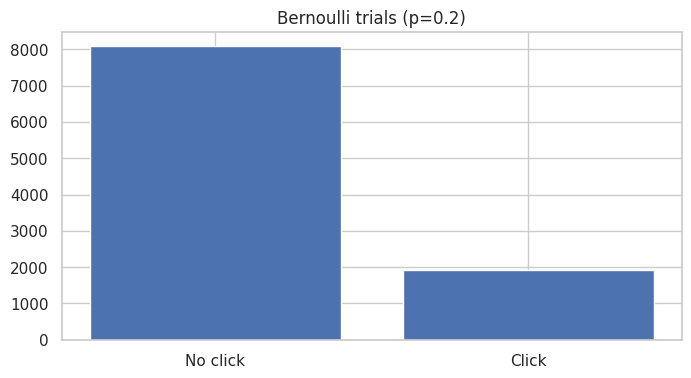

In [12]:
p = 0.2   # probability of click; change as needed
N = 10000
trials = np.random.binomial(n=1, p=p, size=N)  # 1 = click, 0 = no click

clicks = np.sum(trials)
prop = clicks / N
print(f'Out of {N} visitors, clicks = {clicks}, proportion = {prop:.4f}')

# Bar plot
plt.bar(['No click','Click'], [N - clicks, clicks])
plt.title(f'Bernoulli trials (p={p})')
plt.show()


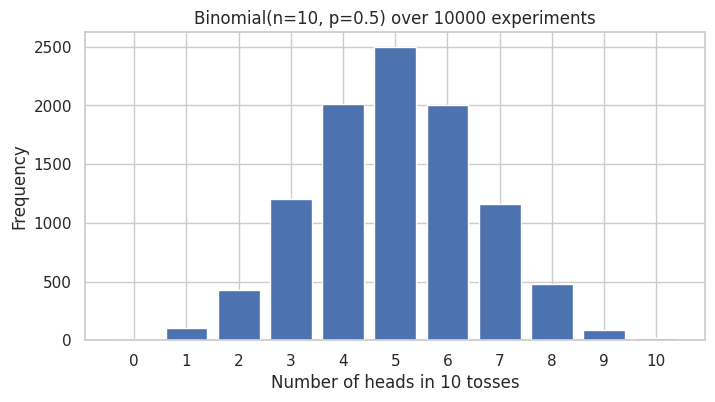

Mean (empirical) = 5.0024 Expected = 5.0
Variance (empirical) = 2.52459424 Expected = 2.5


In [13]:
trials = 10000    # number of experiments
n = 10            # tosses per experiment
p = 0.5           # fair coin

outcomes = np.random.binomial(n=n, p=p, size=trials)  # each element = number of heads in 10 tosses

# Plot
plt.hist(outcomes, bins=np.arange(-0.5, n+1.5, 1), rwidth=0.8, density=False)
plt.xlabel('Number of heads in 10 tosses')
plt.ylabel('Frequency')
plt.title(f'Binomial(n={n}, p={p}) over {trials} experiments')
plt.xticks(range(n+1))
plt.show()

# Quick stats
print('Mean (empirical) =', outcomes.mean(), 'Expected =', n*p)
print('Variance (empirical) =', outcomes.var(), 'Expected =', n*p*(1-p))


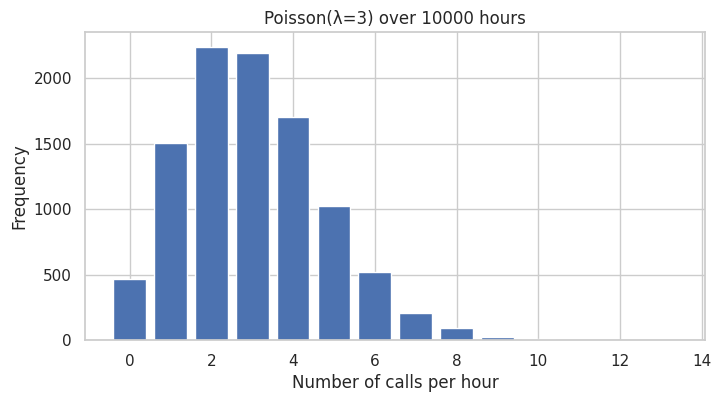

Most likely number of calls per hour (empirical mode) = 2


In [14]:
lam = 3      # average calls per hour
hours = 10000

samples = np.random.poisson(lam=lam, size=hours)

# histogram
plt.hist(samples, bins=range(0, max(samples)+2), align='left', rwidth=0.8)
plt.xlabel('Number of calls per hour')
plt.ylabel('Frequency')
plt.title(f'Poisson(λ={lam}) over {hours} hours')
plt.show()

# Most likely number of calls (mode)
vals, counts = np.unique(samples, return_counts=True)
mode = vals[np.argmax(counts)]
print(f'Most likely number of calls per hour (empirical mode) = {mode}')


# 🎲 Uniform Distribution

The **Uniform Distribution** is a type of probability distribution in which all outcomes are equally likely within a given interval.



## 🔹 1. Discrete Uniform Distribution
- Random variable takes **finite, countable outcomes**, each with **equal probability**.  
- **Probability of each outcome:**  
$$
P(X = x_i) = \frac{1}{n}, \quad i = 1, 2, \dots, n
$$  
- **Example:** Rolling a fair die (1–6).  

---

## 🔹 2. Continuous Uniform Distribution
- Random variable can take any value within a **continuous interval** $[a, b]$, with all values **equally likely**.  
- **Probability Density Function (PDF):**  
$$
f(x) =
\begin{cases}
\frac{1}{b-a}, & a \leq x \leq b \\[2mm]
0, & \text{otherwise}
\end{cases}
$$  
- **Mean:**  
$$
\mu = \frac{a+b}{2}
$$  
- **Variance:**  
$$
\sigma^2 = \frac{(b-a)^2}{12}
$$  
- **Example:** Random number between 0 and 1.  

---





###  1. Write an python code to plots the probability distribution of a single die roll. Identify the type of probability distribution shown,

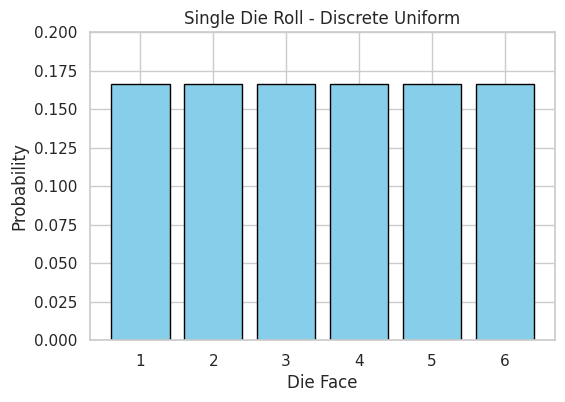

In [15]:
import matplotlib.pyplot as plt

faces = [1, 2, 3, 4, 5, 6]
probabilities = [1/6]*6  # equal probability

plt.figure(figsize=(6,4))
plt.bar(faces, probabilities, color='skyblue', edgecolor='black')
plt.title("Single Die Roll - Discrete Uniform")
plt.xlabel("Die Face")
plt.ylabel("Probability")
plt.ylim(0, 0.2)
plt.show()


#### 2. Write a Python code generates 100,000,00 random numbers from a continuous uniform distribution 𝑈(0,1) and plots a histogram.

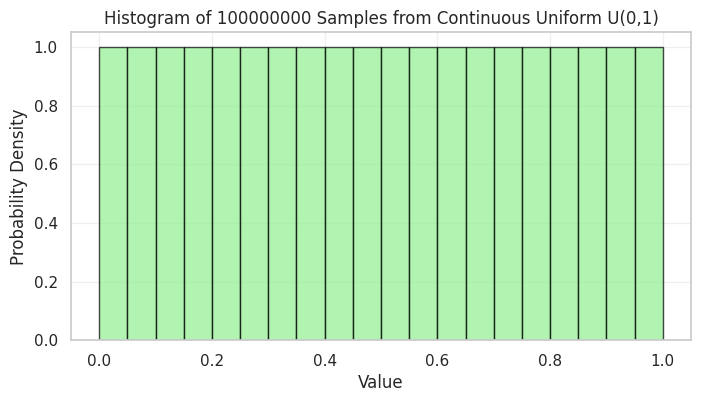

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random numbers from U(0,1)
samples = np.random.uniform(0, 1, 100000000)

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(samples, bins=20, density=True, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Histogram of 100000000 Samples from Continuous Uniform U(0,1)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(alpha=0.3)
plt.show()



# Normal Distribution vs Standard Normal Distribution



## 🔹 Normal Distribution
- The Normal distribution (also called the Gaussian distribution) is the most widely used probability distribution in statistics and machine learning. It is represented by a bell-shaped curve.

- Defined by two parameters:  
  - Mean ($\mu$) → center of the distribution  
  - Standard deviation ($\sigma$) → spread of the distribution

Display formula:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

---
##### Examples in Real Life

Heights of people

IQ scores

Measurement errors in experiments

[![1.png](https://i.postimg.cc/QtbxF8gp/1.png)](https://postimg.cc/JDsWgW2n)

[![55.png](https://i.postimg.cc/0Q4jGFsH/55.png)](https://postimg.cc/Vrjzm75j)

## According to the Empirical Rule for Normal Distribution:
#### 68.27% of data lies within 1 standard deviation of the mean.
#### 95.45% of data lies within 2 standard deviations of the mean.
#### 99.73% of data lies within 3 standard deviations of the mean.
Thus, almost all the data lies within 3 standard deviations. This rule enables us to check for Outliers and is very helpful when determining the normality of any distribution.

## 🔹 Standard Normal Distribution
- A **special case** of the normal distribution with $\mu = 0$ and $\sigma = 1$.

Display formula:

$$
f(z) = \frac{1}{\sqrt{2\pi}}\exp\!\left(-\frac{z^2}{2}\right)
$$

Use the **z-score** to convert:

$$
z = \frac{x - \mu}{\sigma}
$$

---

## 🔹 Key Difference

| Feature   | Normal Distribution        | Standard Normal Distribution |
|-----------|----------------------------|------------------------------|
| Mean      | Any value ($\mu$)         | $0$                          |
| Std Dev   | Any positive value ($\sigma$) | $1$                     |
| Variable  | $X$                       | $Z$                          |
| Use Case  | Real-world data           | Statistical testing, z-tables |

---

**In short:**  
- **Normal distribution** — general form (any $\mu$, any $\sigma$).  
- **Standard normal** — normalized ($\mu=0,\ \sigma=1$).

[![44.png](https://i.postimg.cc/s2WJd8PF/44.png)](https://postimg.cc/4KJcpWFw)



One more important phenomena of a normal distribution is that it retains the normal shape throughout, unlike other probability distributions that change their properties after a transformation. For a Normal Distribution:

Product of two Normal Distribution results into a Normal Distribution
The Sum of two Normal Distributions is a Normal Distribution
Convolution of two Normal Distribution is also a Normal Distribution
Fourier Transformation of a Normal Distribution is also Normal

### 3.	Generate the 10000 random numbers using stanadrd  normal distribution mean =0 and variance =1, and plot the normal distributions using seaborn.



In [17]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(32)
data= norm.rvs(size=10000,loc=10,scale=2)


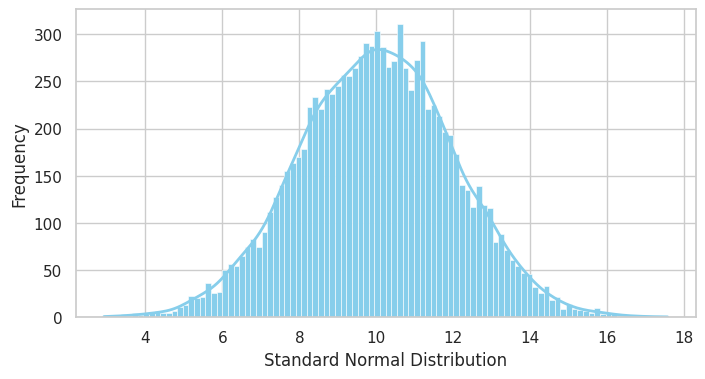

In [18]:

# Example: fixed code with histplot
ax = sns.histplot(data,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth': 2},   # For KDE line style
                  alpha=1)                     # For bar transparency

ax.set(xlabel='Standard Normal Distribution', ylabel='Frequency')
plt.show()


# 🎯 Bernoulli Distribution

A **Bernoulli Distribution** models a **single trial experiment** with **two possible outcomes**:  

- **Success (1)**  
- **Failure (0)**  

If \(X\) is a Bernoulli random variable:

$$
P(X = 1) = p \quad \text{and} \quad P(X = 0) = 1-p
$$

Where 0<=p<=1 is the **probability of success**.  

### 4.	A new feature is being tested on a website. For each visitor, they either click the feature (success) or do not click (failure). The probability of a click is 𝑝 = 0.3 p=0.3. Simulate 10,000 visitors using a Bernoulli distribution. write an python code. Plot the results using Seaborn. Determine the proportion of visitors who clicked the feature.

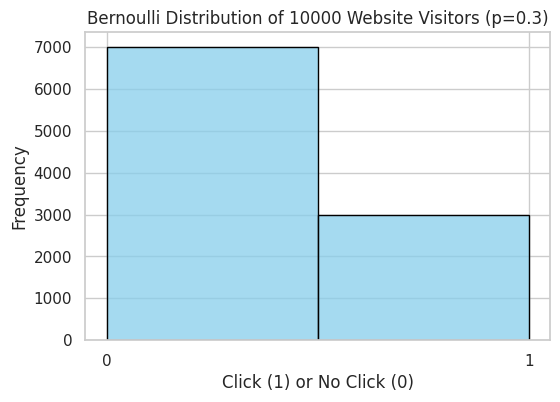

Proportion of visitors who clicked the feature: 0.2998


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Parameters
p = 0.3        # probability of success (click)
size = 10000   # number of visitors

# Generate Bernoulli data
data = bernoulli.rvs(p, size=size)

# Plot the Bernoulli distribution
plt.figure(figsize=(6,4))
ax = sns.histplot(data, bins=2, kde=False, color='skyblue', edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xlabel('Click (1) or No Click (0)')
ax.set_ylabel('Frequency')
ax.set_title(f'Bernoulli Distribution of {size} Website Visitors (p={p})')
plt.show()

# Calculate the proportion of visitors who clicked
proportion_clicks = np.mean(data)
print(f"Proportion of visitors who clicked the feature: {proportion_clicks:.4f}")


# Binomial Distributions


A **Binomial Distribution** models the **number of successes** in \(n\) independent Bernoulli trials, each with the **same probability of success \(p\)**.  

If \(X\) is a Binomial random variable:  

$$
X \sim \text{Binomial}(n, p)
$$

The **probability of exactly \(k\) successes** is:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, 2, \dots, n
$$


---

## 🔹 Properties

- **Mean (Expected Value):**  
$$
\mu = E[X] = n \cdot p
$$

- **Variance:**  
$$
\sigma^2 = n \cdot p \cdot (1-p)
$$

- Only **integer outcomes** from 0 to \(n\).  
- Sum of \(n\) independent **Bernoulli trials**.  

---

### 5.	A coin is tossed 10 times. The probability of getting heads (success) is 𝑝=0.5.Generate 10,000 random numbers representing the number of heads in 10 tosses using a Binomial distribution.Plot the Binomial distribution using Seaborn.Identify the most likely number of heads in 10 tosses.Explain the shape of the histogram and why it is symmetric around the expected value.

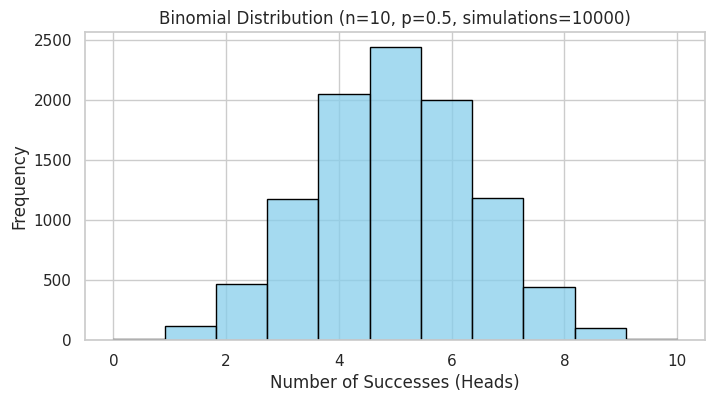

The most likely number of heads in 10 tosses is: 5


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10      # number of trials
p = 0.5     # probability of success
size = 10000  # number of simulations

# Generate Binomial data
data = binom.rvs(n, p, size=size)

# Plot the Binomial distribution
plt.figure(figsize=(8,4))
ax = sns.histplot(data, bins=n+1, kde=False, color='skyblue', edgecolor='black')
ax.set_xlabel('Number of Successes (Heads)')
ax.set_ylabel('Frequency')
ax.set_title(f'Binomial Distribution (n={n}, p={p}, simulations={size})')
plt.show()

# Calculate the most likely number of successes
(unique, counts) = np.unique(data, return_counts=True)
mode = unique[np.argmax(counts)]
print(f"The most likely number of heads in 10 tosses is: {mode}")


# Poisson distribution
The **Poisson Distribution** models the **number of events occurring in a fixed interval** (time, space, etc.) under the following conditions:  

1. Events occur **independently**.  
2. The **average rate** (\(\lambda\)) is constant.  
3. Two events cannot occur at the same exact instant.  

If \(X\) is a Poisson random variable:

$$
X \sim \text{Poisson}(\lambda)
$$

The **probability of observing exactly \(k\) events** is:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

Where:  
- \(\lambda > 0\) → mean number of events in the interval  
- \(k\) → number of occurrences  

---

## 🔹 Properties

- **Mean (Expected Value):**  
$$
\mu = E[X] = \lambda
$$

- **Variance:**  
$$
\sigma^2 = \lambda
$$

- Discrete distribution (integer counts 0, 1, 2, …)  

---

## 🔹 Examples

1. Number of emails received per hour $$ \lambda=5 $$
2. Number of cars passing a toll booth per minute $$ \lambda=12 $$


### 6.	A call center receives an average of 3 calls per hour. Using a Poisson distribution with  𝜇=3 Simulate 10,000 hours of calls.Plot a histogram of the number of calls per hour.What is the most likely number of calls in an hour?

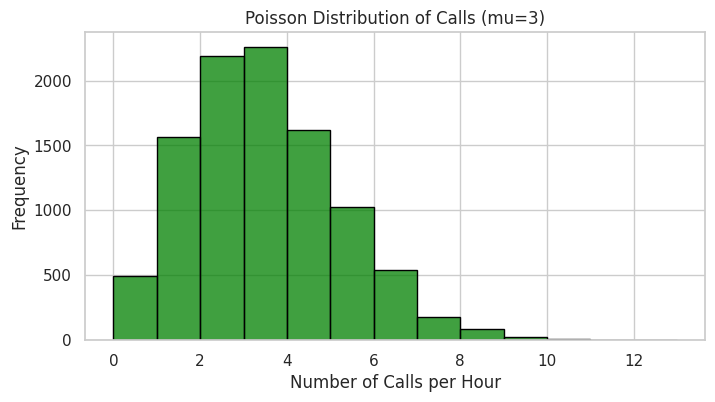

The most likely number of calls in an hour is: 3


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns

# Parameters
mu = 3          # average number of calls per hour
size = 10000    # number of simulated hours

# Generate Poisson data
data_poisson = poisson.rvs(mu=mu, size=size)

# Plot histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(data_poisson, bins=range(0, max(data_poisson)+2),
                  kde=False, color='green', edgecolor='black')
ax.set(xlabel='Number of Calls per Hour', ylabel='Frequency',
       title=f'Poisson Distribution of Calls (mu={mu})')

plt.show()

# Find the most likely number of calls (mode)
(unique, counts) = np.unique(data_poisson, return_counts=True)
mode = unique[np.argmax(counts)]
print(f"The most likely number of calls in an hour is: {mode}")
